Importing Requisite Libraries

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all'

import warnings
warnings.filterwarnings('ignore')

%config InlineBackend.figure_format='retina'

In [26]:
import tensorflow
from tensorflow import keras
from keras.models import  Sequential
from keras.layers import Dense, Dropout


Loading the dataset

In [27]:
df = pd.read_csv(r"/content/drive/MyDrive/dataset/3.concertriccir2.csv", header = None)

In [28]:
df.head()

,0,1,2
0,0.700335,-0.247068,0.0
1,-3.950019,2.740080,1.0
2,0.150222,-2.157638,1.0
3,-1.672050,-0.941519,1.0
4,2.560483,-1.846577,1.0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       500 non-null    float64
 1   1       500 non-null    float64
 2   2       500 non-null    float64
dtypes: float64(3)
memory usage: 11.8 KB


Plotting the datapoints to identify shape

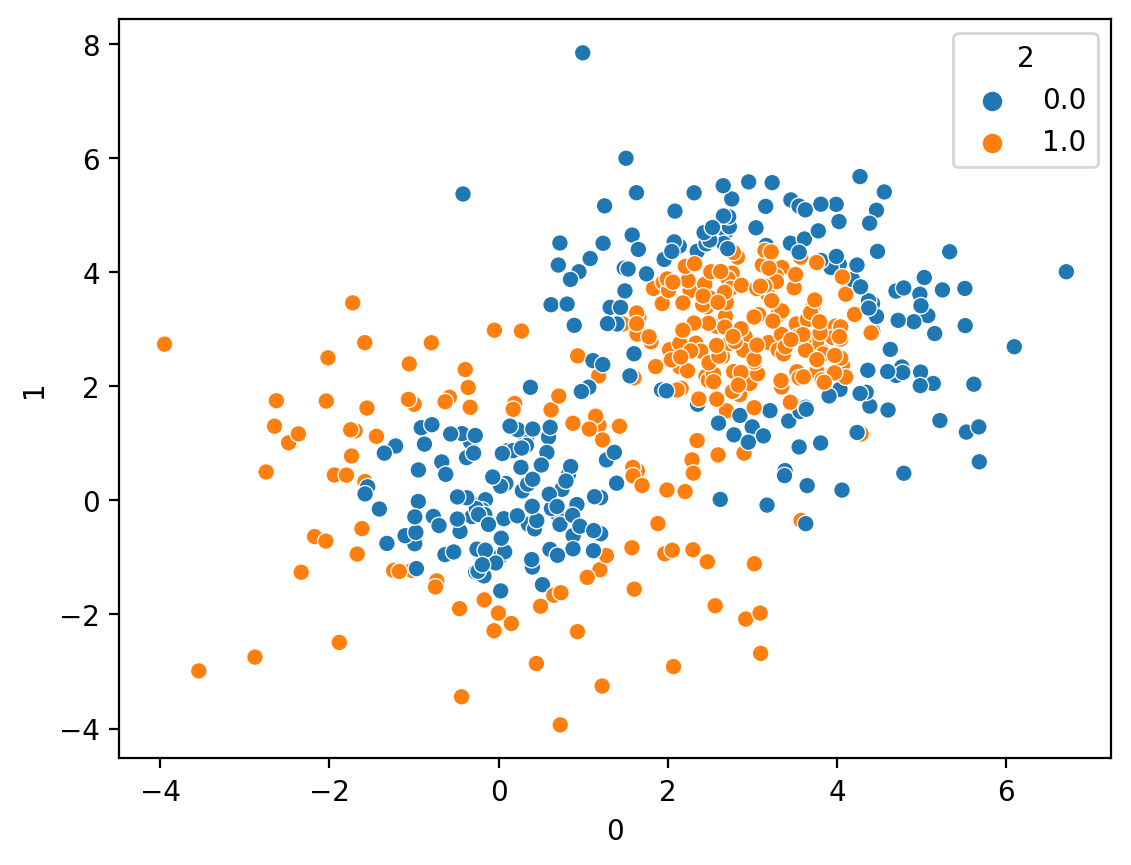

In [30]:
sns.scatterplot(x = 0,y=1, hue = 2, data = df);

Performing train test split and Building MLP

In [31]:
X = df[[0,1]]
y=df[2]

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

In [33]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train_trans=std.fit_transform(X_train)

In [34]:
X_test_trans = std.transform(X_test)

In [35]:
model = Sequential()

model.add(Dense(12,activation='relu', input_dim = 2))
model.add(Dense(10,activation='relu'))
model.add(Dense(9,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(3,activation='relu'))
model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

Model Compilation and Training

In [36]:
model.compile(optimizer='Adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [37]:
history = model.fit(X_train_trans,y_train,epochs = 80 ,validation_split = 0.2 )

Epoch 1/80
10/10 [==============================] - 5s 86ms/step - loss: 0.6938 - accuracy: 0.5000 - val_loss: 0.6951 - val_accuracy: 0.4750
Epoch 2/80
10/10 [==============================] - 0s 22ms/step - loss: 0.6929 - accuracy: 0.5063 - val_loss: 0.6945 - val_accuracy: 0.4750
Epoch 3/80
10/10 [==============================] - 0s 30ms/step - loss: 0.6921 - accuracy: 0.5063 - val_loss: 0.6935 - val_accuracy: 0.4750
Epoch 4/80
10/10 [==============================] - 0s 23ms/step - loss: 0.6912 - accuracy: 0.5063 - val_loss: 0.6930 - val_accuracy: 0.4750
Epoch 5/80
10/10 [==============================] - 0s 32ms/step - loss: 0.6897 - accuracy: 0.5063 - val_loss: 0.6919 - val_accuracy: 0.4750
Epoch 6/80
10/10 [==============================] - 0s 27ms/step - loss: 0.6881 - accuracy: 0.5063 - val_loss: 0.6908 - val_accuracy: 0.4750
Epoch 7/80
10/10 [==============================] - 0s 24ms/step - loss: 0.6863 - accuracy: 0.5063 - val_loss: 0.6895 - val_accuracy: 0.4750
Epoch 8/80
10

MLP Evaluation and Plotting decision surfaces

In [38]:
Y_cap = model.predict(X_test_trans)

4/4 [==============================] - 0s 4ms/step


In [39]:
Y_cap_f = np.where(Y_cap>0.5,1,0)

In [40]:
Y_cap_f

array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,Y_cap_f)

0.88

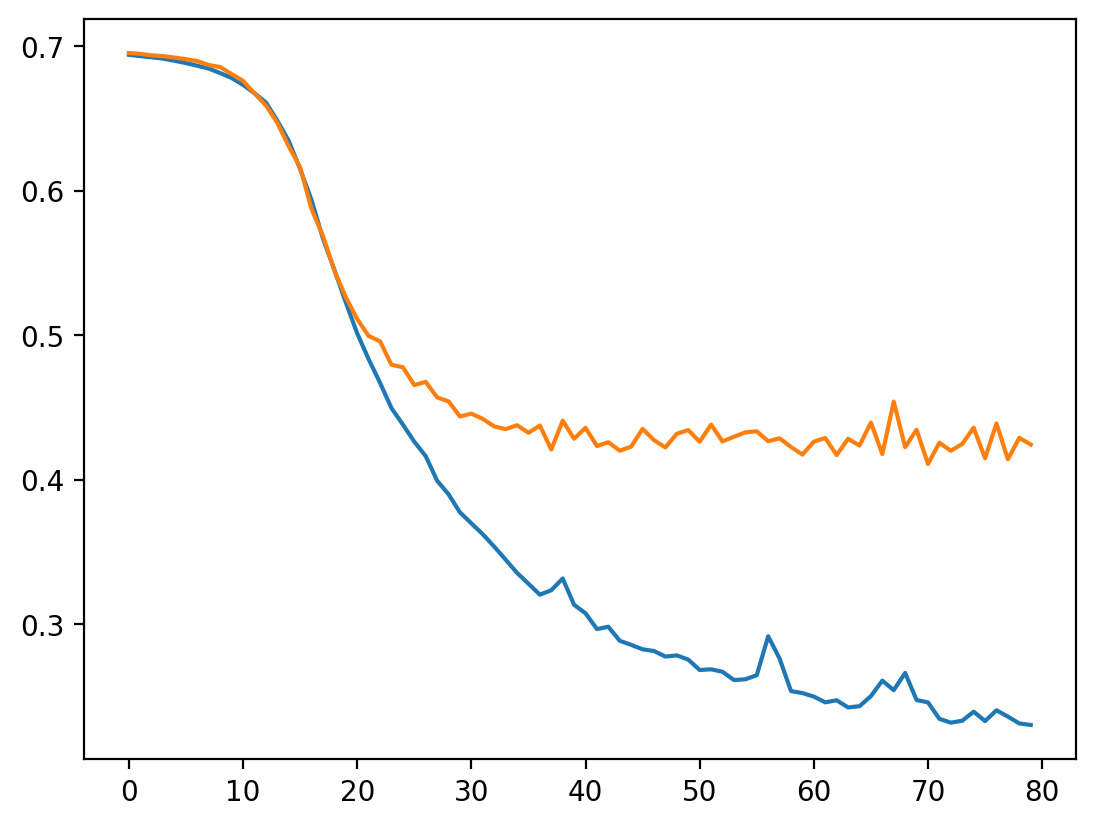

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']);

In [43]:
!pip install mlxtend --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [44]:
from mlxtend.plotting import plot_decision_regions

9600/9600 [==============================] - 32s 3ms/step


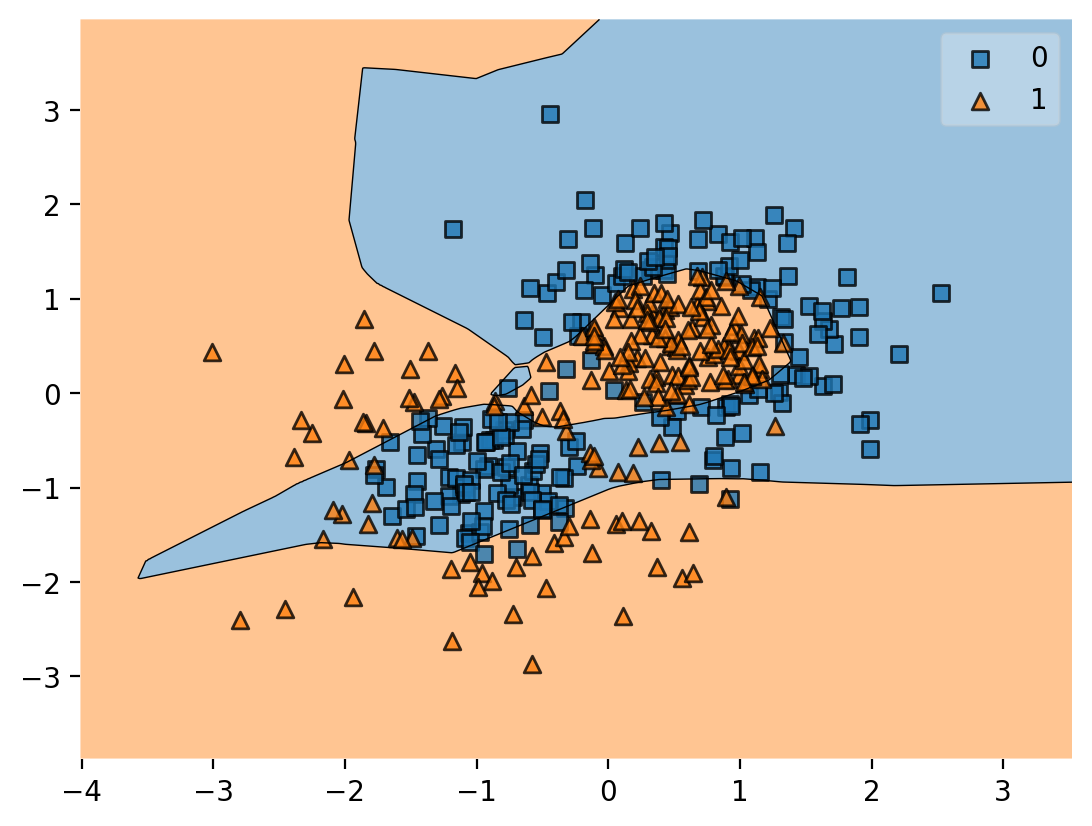

In [45]:
plot_decision_regions(X_train_trans, y_train.values.astype(int), clf = model);

9600/9600 [==============================] - 24s 2ms/step


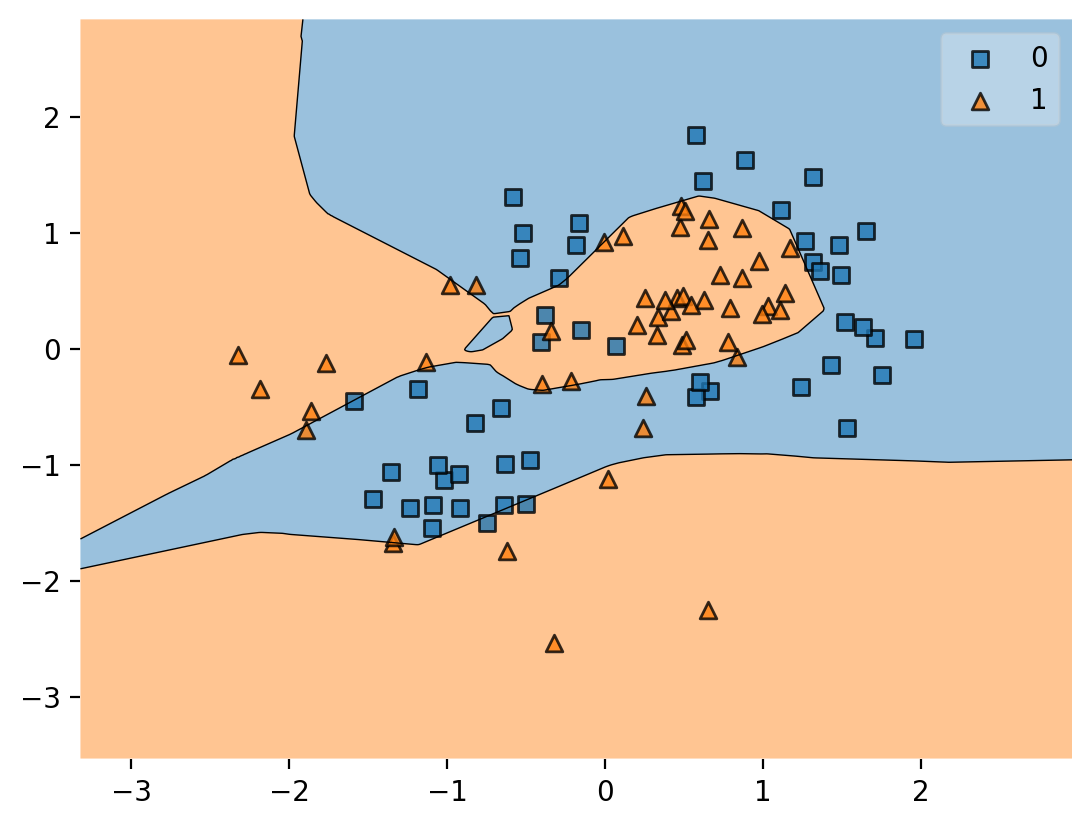

In [46]:
plot_decision_regions(X_test_trans, y_test.values.astype(int), clf = model);